# Data Protocol Privacy Engineering Certification

## K-Anonymity Living Lab

![Data Protocol Privacy Engineering Certification](./images/nishant_pe.png)

This workbook is part of the [Data Protocol Privacy Engineering Certification](https://dataprotocol.com/). Working with data and anonymizing data is a growing essential skill that has to be learned as well as applied. To fully understand and benefit from this workbook, take the [course](https://dataprotocol.com/), read the [book](https://www.manning.com/books/privacy-engineering), and get certified!

This is a Juypter Labs workbook, If you are completely new to Jupyter workbooks and want to understand how to use, please watch [this short video](https://youtu.be/A5YyoCKxEOU?t=106) to learn the basics.

## Introduction to K-Anonymity

This introduction looks at k-anonymity, a privacy model commonly applied to protect the data subjects’ privacy in data sharing scenarios, and the guarantees that k-anonymity can provide when used to anonymise data. 

Sharing data is a very important decision to take. It is impossible to get data back once shared and liabilities can be tremendously high, especially if the data being shared can be used to identify individuals and lead to a loss of privacy. You may have tried really hard to anonymize the data being released but legal organizations want to trust more than your word. K-anonymity serves that need by providing one mechanism to quantify the risk contained in any released dataset, it moves the conversation from subjective opinion to factual basis.

## Introduction to the Living Lab - Elite Cars

We are going to use the fictional case study of Elite Cars.  Read the full description on github [here](https://github.com/Data-Protocol/privacy-playground/blob/main/README.md), here is the start

"Elite cars is a new start up that launched in New York just over a month ago. It offers an elite car ride service for the rich and famous and guarantees anonymity and total discretion.  It has captured the imagination of those it was trying to attract and in the first month it has over 4000 very well known people signed up as customers that have already taken over 90,000 trips..."



## The Challenge

New York City has asked Elite Cars to provide their passenger trip records, so they can run their own analysis.  Anonymity is of paramount importance to your customers and to the core promise and identity of the company.  

A dataset has been created that has stripped out unecessary trip data such as tips and links to driver details and passenger details. But the request has asked for the home address, gender and age of the passengers using the service, where they are going from and to, and at what times.  

The challenge in this living lab is to use K-Anonymity to interrogate this dataset and understand the level of risks and concerns that may exist. We are going to do this whole process manually so we can feel what is involved and what needs consideration. In the real world, there are machine learning algorithms that will help you achieve your wanted K-Anonymity values.

But remember, datasets are like dogs - all the same but each one is different and potentially delivers a different bite in different situations.

Let's begin...

## Preparing the Lab

We are going to use python for this exercise since python has many libraries for supporting large datasets such as pandas and numpy, all packaged by [scipy.org](https://scipy.org).  We are not going to do anything advanced so we hope you can follow along and focus on the k-anonymization aspects even if you are not a regular python coder.  

It is necessary to execute each line of the code starting from the top of the workbook.  You can re-execute individual cells after changing the contained code if wanted.

We will first import the main library we will be using - pandas.  This makes working with large datasets very easy. We then load in the master trip dataset that our engineers have generated for us.

In [98]:
import pandas as pd

# Set max line width length for output
# pd.set_option('display.width', 144)

master_df = pd.read_csv("passenger-trips.csv", dtype=str)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97950 entries, 0 to 97949
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Pickup        97950 non-null  object
 1   Dropoff       97950 non-null  object
 2   Pickup_long   97950 non-null  object
 3   Pickup_lat    97950 non-null  object
 4   Dropoff_long  97950 non-null  object
 5   Dropoff_lat   97950 non-null  object
 6   Sex           97950 non-null  object
 7   Zip           97950 non-null  object
 8   DOB           97950 non-null  object
dtypes: object(9)
memory usage: 6.7+ MB


You can see there are 8 fields. We have loaded them all in as strings for simplicity.  There are no empty fields and all fields have been padded with "*" characters where necessary, to give them uniform length.

In [99]:
print("Master Dataset size = ", len(master_df), '\n')

Master Dataset size =  97950 



As stated by Elite Cars you can see there are 97,950 rows of data, which is all of the trip data in the company.  

In [100]:
display(master_df.head(3))

,Pickup,Dropoff,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB
0,2015-01-15 19:05:39,2015-01-15 19:23:42,-73.993896484375***,40.750110626220703,-73.974784851074219,40.750617980957031,M,10889,1968-07-20
1,2015-01-10 20:33:38,2015-01-10 20:53:28,-74.00164794921875*,40.7242431640625**,-73.994415283203125,40.759109497070313,F,10384,1980-07-08
2,2015-01-10 20:33:38,2015-01-10 20:43:41,-73.963340759277344,40.802787780761719,-73.951820373535156,40.824413299560547,M,10422,1996-06-21


We have printed the top 3 rows of the data. You can see the data is incredibly detailed both from a time and location point of view.  This is a data set that looks anonymous at first glance since there is no clear Personally Identifying Information (PII) visible.  But it is exactly the opposite.  Let's use K-anonymity to quantify that statement.

## Analyse dataset for k-anonymity

To help, we will create helper functions as we introduce new techniques to study our dataset. The first analyses the dataset and prints out key k-anonymity findings.



In [101]:
def analyse_table_k_anon(df):

    print("\n-----------------------\n")
    print("Dataset K-Anon Analysis\n")
    print("-----------------------\n")

    print("Dataset size = ", len(df))
    print("\n-----------------------\n")

    print("K-Anonymity Min to Max Values\n")
    groupings = df.value_counts(ascending=True).reset_index(name='freq')
    
    display(groupings)

    print("\n-----------------------\n")
    print(
        "\nOverall K-Anonymity Classification for dataset = ", groupings['freq'][0], "\n"
    )
    print("\n-----------------------\n")

analyse_table_k_anon(master_df)



-----------------------

Dataset K-Anon Analysis

-----------------------

Dataset size =  97950

-----------------------

K-Anonymity Min to Max Values



,Pickup,Dropoff,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB,freq
0,2015-01-01 00:09:45,2015-01-01 00:13:50,-73.996726989746094,40.744548797607422,-74.002204895019531,40.750385284423828,F,10565,1965-03-30,1
1,2015-01-21 14:45:34,2015-01-21 15:02:48,-73.9559326171875**,40.763961791992188,-73.988739013671875,40.736881256103516,F,10535,1979-02-02,1
2,2015-01-21 14:45:34,2015-01-21 14:59:41,-73.956916809082031,40.784225463867188,-73.9859619140625**,40.772186279296875,M,10220,1957-01-09,1
3,2015-01-21 14:45:34,2015-01-21 14:57:34,-73.972564697265625,40.74951171875****,-73.98388671875****,40.725704193115234,F,10766,1994-02-17,1
4,2015-01-21 14:45:33,2015-01-21 14:52:10,-73.974113464355469,40.783061981201172,-73.968673706054688,40.7696533203125**,F,10494,1975-04-16,1
...,...,...,...,...,...,...,...,...,...,...
97945,2015-01-12 05:10:41,2015-01-12 05:11:44,-73.998161315917969,40.745731353759766,-73.994834899902344,40.750255584716797,F,10713,1991-11-13,1
97946,2015-01-12 05:10:39,2015-01-12 05:30:00,-73.78936767578125*,40.647361755371094,-73.743789672851563,40.595340728759766,F,10703,1975-05-27,1
97947,2015-01-12 05:10:38,2015-01-12 05:13:24,-73.950439453125***,40.771511077880859,-73.959632873535156,40.773906707763672,M,10905,1986-07-17,1
97948,2015-01-12 06:29:11,2015-01-12 06:35:44,-74.000511169433594,40.737335205078125,-74.013481140136719,40.715747833251953,M,10100,1978-08-21,1



-----------------------


Overall K-Anonymity Classification for dataset =  1 


-----------------------



## Specificity

The first thing we are going to do is examine each data field type for specificity versus "needed" specificity. Anonymizing datasets is a balance between the analysis wanting to be performed versus the level of detail held within the dataset.  In this case, we do not specifically know the precise details of the reasons why the data is being requested, which can be common in the real world as well.  It is not unusual for a negotiation to take place between wanted interest of the receiver versus risk analysis from the provider.  This is why mathematical analysis of the data to score anonymity in a quantified way is such a powerful concept. There is no judgement, just decisions about risk versus need.  

In this live lab, we shall look at each different field, present possible alternatives, and in our case here, make some arbitary decisions on which we initially choose, so we can then run further mechanisms to hit the k-anonymity numbers wanted.

When looking at datasets, it is important to understand perspective and context can radically change the dangers of any dataset.  The data we are using is all located in the NY area, with very precise date, time and location information. Mapping the location data and correlating the timing with known events in the city could, for example, give a much smaller population of interest. For example, if a film festival is taking place, it can be seen who is traveling to the film festival. We have their home zip codes, sex and date of birth. We can quickly identify which journeys are those taken by famous film stars, where and when they were going to different places not correlated to the film festival, and how often.  Anonymous data has quickly changed into highly focused source of knowledge. Using a similar technique, rather than starting with the dataset let us start with the known home address of a famous film actor, and see if that location is either at the start and/or end of any journeys. You can see by using other public information, the data that we currently have in this dataset can be used to identify people very quickly.  The exact inverse of what is needed by Elite Cars.

### Pickup and Dropoff Location Data

Let us start by looking at the specificity of the location data.  


In [102]:
location_columns  = master_df.head()[['Pickup_long', 'Pickup_lat', 'Dropoff_long', 'Dropoff_lat']]
display(location_columns)

,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat
0,-73.993896484375***,40.750110626220703,-73.974784851074219,40.750617980957031
1,-74.00164794921875*,40.7242431640625**,-73.994415283203125,40.759109497070313
2,-73.963340759277344,40.802787780761719,-73.951820373535156,40.824413299560547
3,-74.009086608886719,40.713817596435547,-74.004325866699219,40.719985961914063
4,-73.971176147460938,40.762428283691406,-74.004180908203125,40.742652893066406


The gps coordinates have 15 decimal places.  Using acuracy information on [gis.stackexhange.com](https://gis.stackexchange.com/questions/8650/measuring-accuracy-of-latitude-and-longitude/) we see... 

- The tens digit gives a position to about 1,000 kilometers. It gives us useful information about what continent or ocean we are on.
- The units digit (one decimal degree) gives a position up to 111 kilometers (60 nautical miles, about 69 miles). It can tell us roughly what large state or country we are in.
- The first decimal place is worth up to 11.1 km: it can distinguish the position of one large city from a neighboring large city.
- The second decimal place is worth up to 1.1 km: it can separate one village from the next.
- The third decimal place is worth up to 110 m: it can identify a large agricultural field or institutional campus.
- The fourth decimal place is worth up to 11 m: it can identify a parcel of land. It is comparable to the typical accuracy of an uncorrected GPS unit with no interference.
- The fifth decimal place is worth up to 1.1 m: it distinguish trees from each other. Accuracy to this level with commercial GPS units can only be achieved with differential correction.
- The sixth decimal place is worth up to 0.11 m: you can use this for laying out structures in detail, for designing landscapes, building roads. It should be more than good enough for tracking movements of glaciers and rivers. This can be achieved by taking painstaking measures with GPS, such as differentially corrected GPS.
- The seventh decimal place is worth up to 11 mm: this is good for much surveying and is near the limit of what GPS-based techniques can achieve.
- The eighth decimal place is worth up to 1.1 mm: this is good for charting motions of tectonic plates and movements of volcanoes. Permanent, corrected, constantly-running GPS base stations might be able to achieve this level of accuracy.
- The ninth decimal place is worth up to 110 microns: we are getting into the range of microscopy. For almost any conceivable application with earth positions, this is overkill and will be more precise than the accuracy of any surveying device.
- Ten or more decimal places indicates a computer or calculator was used and that no attention was paid to the fact that the extra decimals are useless. Be careful, because unless you are the one reading these numbers off the device, this can indicate low quality processing!

We are clearly looking at data that is a result of a calculation.  We are deciding the most important fields in this dataset are ones relating to location analysis so we shall reduce all the locaation to having 2 decimal points which is approximately 1.1 km accuracy.

In [103]:
new_df = master_df.copy()
gps_cols = ['Pickup_long', 'Pickup_lat', 'Dropoff_long', 'Dropoff_lat']
new_df[gps_cols] = new_df[gps_cols].replace(to_replace ="(^.*\.[0-9]{2}).*", value = r"\1", regex = True)
display(new_df.head())


,Pickup,Dropoff,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB
0,2015-01-15 19:05:39,2015-01-15 19:23:42,-73.99,40.75,-73.97,40.75,M,10889,1968-07-20
1,2015-01-10 20:33:38,2015-01-10 20:53:28,-74.00,40.72,-73.99,40.75,F,10384,1980-07-08
2,2015-01-10 20:33:38,2015-01-10 20:43:41,-73.96,40.80,-73.95,40.82,M,10422,1996-06-21
3,2015-01-10 20:33:39,2015-01-10 20:35:31,-74.00,40.71,-74.00,40.71,F,10847,1964-08-08
4,2015-01-10 20:33:39,2015-01-10 20:52:58,-73.97,40.76,-74.00,40.74,F,10631,1987-05-10


### Pickup and Dropoff Times

Pickup and dropoff times are precise down to the second of pickup and dropoff.  This seems unnecessarily detailed again whatever the analysis.  We could choose to group all trips taken per minute, per hour, per day.  We could drop the date completely and just have a 0-23 bucket structure. This could be a good example of where negotiation is required, depending on what kinds of analysis the city wants to run, balanced against the granularity and specificity of the data that can be released and maintain anonymity.  If we look at the dataset we can see all trips were taken in the month of January 2015, so we already have a high density and frequency of trips over date in this dataset.  We shall choose to group trips that were started in the same hour. We shall do the same for the Dropoff time. 

In [104]:
time_cols = ['Pickup', 'Dropoff']
new_df[time_cols] = new_df[time_cols].replace(to_replace ="(^.*?):.*", value = r"\1", regex = True)
display(new_df.head())

,Pickup,Dropoff,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB
0,2015-01-15 19,2015-01-15 19,-73.99,40.75,-73.97,40.75,M,10889,1968-07-20
1,2015-01-10 20,2015-01-10 20,-74.00,40.72,-73.99,40.75,F,10384,1980-07-08
2,2015-01-10 20,2015-01-10 20,-73.96,40.80,-73.95,40.82,M,10422,1996-06-21
3,2015-01-10 20,2015-01-10 20,-74.00,40.71,-74.00,40.71,F,10847,1964-08-08
4,2015-01-10 20,2015-01-10 20,-73.97,40.76,-74.00,40.74,F,10631,1987-05-10


The Dropoff field does not seem to be adding much value at this granularity level so let's take the decision to delete it.

In [105]:
new_df.drop(columns=['Dropoff'], inplace=True)
display(new_df.head())

,Pickup,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB
0,2015-01-15 19,-73.99,40.75,-73.97,40.75,M,10889,1968-07-20
1,2015-01-10 20,-74.00,40.72,-73.99,40.75,F,10384,1980-07-08
2,2015-01-10 20,-73.96,40.80,-73.95,40.82,M,10422,1996-06-21
3,2015-01-10 20,-74.00,40.71,-74.00,40.71,F,10847,1964-08-08
4,2015-01-10 20,-73.97,40.76,-74.00,40.74,F,10631,1987-05-10


### Date of Birth

The data contains the full date of birth. We shall make a judgement call and say that such granularity is not required and perhaps they are just needing to understand passenger age.  Instead we shall reduce this datafield to just contain year of birth.

In [106]:
dob_cols = ['DOB']
new_df[dob_cols] = new_df[dob_cols].replace(to_replace ="(^.*?)-.*", value = r"\1", regex = True)
display(new_df.head())

,Pickup,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB
0,2015-01-15 19,-73.99,40.75,-73.97,40.75,M,10889,1968
1,2015-01-10 20,-74.00,40.72,-73.99,40.75,F,10384,1980
2,2015-01-10 20,-73.96,40.80,-73.95,40.82,M,10422,1996
3,2015-01-10 20,-74.00,40.71,-74.00,40.71,F,10847,1964
4,2015-01-10 20,-73.97,40.76,-74.00,40.74,F,10631,1987


## Outlier Analysis

The three fields of DOB (now limited to year of birth), sex and home zip code is consistent per individual over the whole dataset.  Let us focus on just these fields and see how they are already behaving over the whole dataset.


In [107]:
pseudo_pii = new_df[['Zip', 'DOB', 'Sex']].copy()

analyse_table_k_anon (pseudo_pii)


-----------------------

Dataset K-Anon Analysis

-----------------------

Dataset size =  97950

-----------------------

K-Anonymity Min to Max Values



,Zip,DOB,Sex,freq
0,10501,1997,F,1
1,10784,1994,M,1
2,10423,1970,M,1
3,10784,1996,F,1
4,10784,1996,M,1
...,...,...,...,...
59995,10703,1991,F,7
59996,10013,1956,F,7
59997,10452,1978,F,8
59998,10606,1964,F,8



-----------------------


Overall K-Anonymity Classification for dataset =  1 


-----------------------



Just looking at these three fields, it is clear that individuals are not lost in buckets but rather individually identifiable. Even if we have no other context then we know there is danger of being able to identify these individuals. We are going to make the judgement call that granularity of zipcode is more important than demographic age data. We are going to further generalize the age to being born in a specific decade.

In [108]:
pseudo_pii['DOB'] = pseudo_pii['DOB'].str[:3] + '0\'s'
analyse_table_k_anon (pseudo_pii)


-----------------------

Dataset K-Anon Analysis

-----------------------

Dataset size =  97950

-----------------------

K-Anonymity Min to Max Values



,Zip,DOB,Sex,freq
0,10198,2000's,M,1
1,10481,1950's,M,1
2,10811,2000's,M,1
3,10481,2000's,M,1
4,10810,2000's,M,1
...,...,...,...,...
10839,10254,1990's,M,23
10840,10355,1980's,M,23
10841,10135,1980's,F,23
10842,10084,1990's,F,24



-----------------------


Overall K-Anonymity Classification for dataset =  1 


-----------------------



It is clear we are going to have remove the specificity of the ZIP code.  Each character in the Zip code defines a more specific location of address. See below courtesy of [loqate.com](https://www.loqate.com/resources/blog/what-is-a-zip-code/)

<img src="./images/zip_structure.png" width="70%"/>

Let us mask off the last 2 digits of the zip code and rerun the analysis.

In [109]:
pseudo_pii['Zip'] = pseudo_pii['Zip'].str[:3] + '**'
analyse_table_k_anon (pseudo_pii)


-----------------------

Dataset K-Anon Analysis

-----------------------

Dataset size =  97950

-----------------------

K-Anonymity Min to Max Values



,Zip,DOB,Sex,freq
0,100**,2000's,F,43
1,105**,2000's,F,46
2,101**,2000's,M,46
3,108**,2000's,F,47
4,103**,2000's,M,49
...,...,...,...,...
115,108**,1980's,M,1149
116,102**,1990's,F,1153
117,105**,1990's,M,1154
118,109**,1990's,M,1159



-----------------------


Overall K-Anonymity Classification for dataset =  43 


-----------------------



With this level of information, we now have k-anonymity of 43 which far exceeds the industry standard of k-anon = 5.  We are using all our trip records here. Let us investigate how this changes if we reduce the number of records we have in the dataset we use for the analysis.  We shall map this out in a bar chart with the x-axis increasing with numbers of records included and the y-axis showing the resulting k-anonymity value.


-----------------------

K-Anon Bar Chart

-----------------------

Example first row of dataset



,Zip,DOB,Sex
0,108**,1960's,M


-----------------------



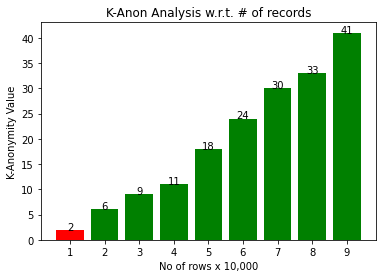

In [110]:
import matplotlib.pyplot as plt

def k_anon_bar_chart(df):
    print("\n-----------------------\n")
    print("K-Anon Bar Chart")
    print("\n-----------------------\n")

    print("Example first row of dataset\n")
    display(df.head(1))
    print("-----------------------\n")
    
    rows = [1, 2, 3, 4, 5, 6, 7, 8, 9]
    k_values = []
    for x in rows:
        x_dataset = df.head(x * 10000)
        matches = x_dataset.value_counts(ascending=True)
        k_values.append(matches.values[0])

    title = "K-Anon Analysis w.r.t. # of records"

    colors = []
    for value in k_values:  # keys are the names of the boys
        if value < 5:
            colors.append("r")
        else:
            colors.append("g")

    plt.bar(rows, k_values, color=colors)
    for i in rows:
        plt.text(i, k_values[i - 1], k_values[i - 1], ha="center")
    plt.title(title)
    plt.xlabel("No of rows x 10,000")
    plt.xticks(rows)
    plt.ylabel("K-Anonymity Value")
    plt.show()

k_anon_bar_chart(pseudo_pii)

We can see we can achieve k-anonymity of 6 with only 20,000 records and k-anonymity of 41 with 90,000 records. This feels like a robust privacy centric dataset at this level.  Let us move these columns into our full data set and see how it looks.

In [111]:
new_df['Zip'] = pseudo_pii['Zip']
new_df['DOB'] = pseudo_pii['DOB']
new_df['Sex'] = pseudo_pii['Sex']

display(new_df.head(3))

,Pickup,Pickup_long,Pickup_lat,Dropoff_long,Dropoff_lat,Sex,Zip,DOB
0,2015-01-15 19,-73.99,40.75,-73.97,40.75,M,108**,1960's
1,2015-01-10 20,-74.00,40.72,-73.99,40.75,F,103**,1980's
2,2015-01-10 20,-73.96,40.80,-73.95,40.82,M,104**,1990's


## Summary

There is nothing we can do to reduce the specificity of the traditional sex field so for now we shall leave it as is. We shall do the same for the zip code until we understand if we need to remove the granularity in later analysis.  

We have greatly reduced the specificity and risk contained in the dataset. We have also reduced the amount of storage and processing required. Let's save the new dataset and compare its size versus the original dataset.

In [112]:
new_df.to_csv("cleaned-trips.csv", index=False)

!ls -lh passenger-trips.csv cleaned-trips.csv

-rw-r--r--  1 geoffhollingworth  staff   5.1M Jul 26 13:12 cleaned-trips.csv
-rw-r--r--@ 1 geoffhollingworth  staff    13M Jul 16 15:05 passenger-trips.csv


We can see the new file size is a third the size of the original, and much less toxic therefore less risky.  Tremendous cost and efficiency savings can be made in addition to privacy management, through disciplined data management.  

This has been a fast introduction to how to view datasets from a mathematical k-anonymity perspective, to allow you to quantify risk with others in the organisation and beyond.  

Take these skills and tools and apply them to your own datasets, and/or play around with better solutions to the one contained here.  Be a Data Protector!
